In [1]:
import pandas
import matplotlib.pyplot
import seaborn

import espn_fantasy_rugby.team_selector
import espn_fantasy_rugby.io

In [2]:
espn_data = espn_fantasy_rugby.io.read_espn_data('../data/espn_rugby_data.xlsx')

In [12]:
team_each_round = pandas.DataFrame()

for tournament_round in [1, 2, 3, 4, 5]:
    
    round_data = espn_data.loc[
        (espn_data['ROUND']==tournament_round)&
        (espn_data['MDP']>0)
    ]
    
    problem = espn_fantasy_rugby.team_selector.create_team_selection_problem(round_data, target='MDP')
#     problem = espn_fantasy_rugby.team_selector.add_nationality_constraint(problem, round_data)
    problem = espn_fantasy_rugby.team_selector.add_position_constraint(problem, round_data)
    
    team = espn_fantasy_rugby.team_selector.get_team(problem, round_data)
    
    team_actuals = espn_fantasy_rugby.team_selector.get_actual_player_points(team, espn_data, tournament_round)
    team_actuals['ROUND'] = tournament_round
    team_each_round = team_each_round.append(team_actuals)

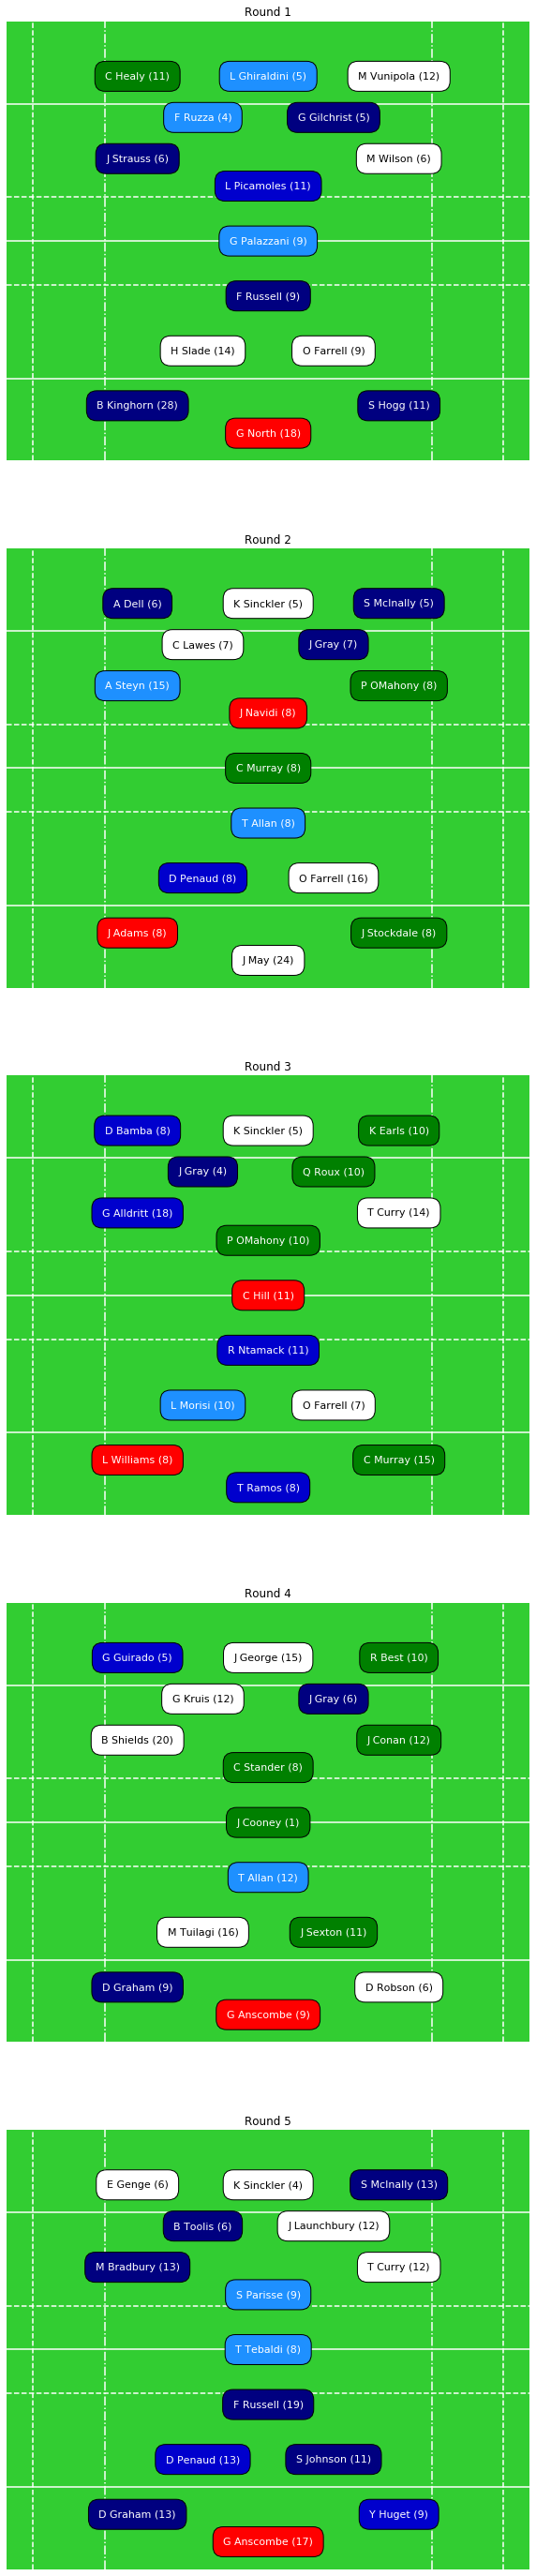

In [13]:
fig, ax = matplotlib.pyplot.subplots(figsize=(10,50), nrows=5, ncols=1)
for tournament_round in [1,2,3,4,5]:
    team_round = team_each_round[team_each_round['ROUND']==tournament_round]
    espn_fantasy_rugby.team_selector.show_team(team_round, ax[tournament_round-1])
    ax[tournament_round-1].set_title('Round {}'.format(tournament_round))
matplotlib.pyplot.show()